In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import folium

In [5]:
csv_file=("C:\\Users\\muska\\OneDrive\\Desktop\\Ecolinkdaanew\\Ecolinkdaanew\\DAAdatasetfinal.csv")

In [6]:
def Data(file_path):
    df = pd.read_csv(file_path)
    G = nx.Graph()
    for _, row in df.iterrows():
        weight = row["Distance (km)"] + row["Risk Level"] * 50
        G.add_edge(row["Source"], row["Destination"], Distance=row["Distance (km)"], Risk=row["Risk Level"], Weight=weight)
    return G, df

graph, df = Data(csv_file)

In [7]:
print("Available nodes (Sources and Destinations):")
nodes = set(df['Source']).union(set(df['Destination']))
print(nodes)

Available nodes (Sources and Destinations):
{'Manas', 'Kanha', 'Gir Forest', 'Sariska', 'Bandipur', 'Ranthambore', 'Kaziranga', 'Jim Corbett', 'Bandhavgarh', 'Rajaji', 'Mudumalai', 'Periyar', 'Tadoba', 'Sundarbans', 'Nagarhole', 'Pench'}


In [8]:
print("Nodes are:", graph.nodes())
print("Edges with weights are:")
for edge in graph.edges(data=True):
    print(edge)

Nodes are: ['Jim Corbett', 'Rajaji', 'Kaziranga', 'Sundarbans', 'Gir Forest', 'Ranthambore', 'Bandipur', 'Kanha', 'Periyar', 'Manas', 'Bandhavgarh', 'Pench', 'Sariska', 'Nagarhole', 'Mudumalai', 'Tadoba']
Edges with weights are:
('Jim Corbett', 'Rajaji', {'Distance': 1121.0, 'Risk': 5, 'Weight': 1371.0})
('Jim Corbett', 'Kaziranga', {'Distance': 1649.3, 'Risk': 3, 'Weight': 1799.3})
('Jim Corbett', 'Sundarbans', {'Distance': 1429.35, 'Risk': 3, 'Weight': 1579.35})
('Jim Corbett', 'Gir Forest', {'Distance': 1284.26, 'Risk': 3, 'Weight': 1434.26})
('Jim Corbett', 'Ranthambore', {'Distance': 464.39, 'Risk': 3, 'Weight': 614.39})
('Jim Corbett', 'Bandipur', {'Distance': 1998.14, 'Risk': 3, 'Weight': 2148.1400000000003})
('Jim Corbett', 'Kanha', {'Distance': 824.37, 'Risk': 3, 'Weight': 974.37})
('Jim Corbett', 'Periyar', {'Distance': 2233.49, 'Risk': 3, 'Weight': 2383.49})
('Jim Corbett', 'Manas', {'Distance': 1392.15, 'Risk': 3, 'Weight': 1542.15})
('Jim Corbett', 'Bandhavgarh', {'Distanc

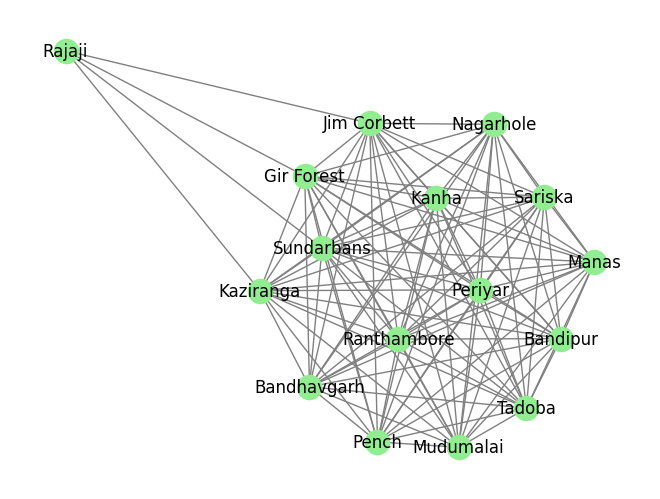

In [9]:
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', edge_color='gray')
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
plt.show()

In [16]:
def find_minimal_path(source, destination, G):
    mst = nx.minimum_spanning_tree(G, weight='Weight')
    try:
        path = nx.shortest_path(mst, source=source, target=destination, weight='Weight')
        print(f"Path found: {path}")
        return path
    except nx.NetworkXNoPath:
        return None

In [11]:
def create_coordinates(df):
    coordinates = {}
    for _, row in df.iterrows():
        coordinates[row['Source']] = (row['Source_Latitude'], row['Source_Longitude'])
        coordinates[row['Destination']] = (row['Destination_Latitude'], row['Destination_Longitude'])
    return coordinates


In [12]:
coordinates = create_coordinates(df)
print(coordinates)

{'Jim Corbett': (29.53, 78.774), 'Rajaji': (27.16609666, 84.68963591), 'Kaziranga': (26.576, 93.336), 'Sundarbans': (21.949, 89.183), 'Gir Forest': (21.124, 70.824), 'Ranthambore': (26.017, 76.502), 'Bandipur': (11.657, 76.629), 'Kanha': (22.334, 80.611), 'Periyar': (9.466, 77.253), 'Manas': (26.733, 91.0), 'Bandhavgarh': (23.692, 81.051), 'Pench': (21.763, 79.307), 'Sariska': (27.103, 76.375), 'Nagarhole': (12.091, 76.25), 'Mudumalai': (11.568, 76.646), 'Tadoba': (20.229, 79.418)}


In [17]:
def create_map(minimal_path, coordinates):
    # Create map centered around the average latitude and longitude
    eco_map = folium.Map(location=[df['Source_Latitude'].mean(), df['Source_Longitude'].mean()], zoom_start=6)

    # Add markers for each node in the path
    for place in minimal_path:
        if place in coordinates:
            lat, lon = coordinates[place]
            folium.Marker(
                location=[lat, lon],
                popup=place,
                icon=folium.Icon(color='blue', icon='info-sign')
            ).add_to(eco_map)

    # Add polyline for the minimal path
    for source, destination in zip(minimal_path, minimal_path[1:]):
        if source in coordinates and destination in coordinates:
            source_coords = coordinates[source]
            destination_coords = coordinates[destination]
            folium.PolyLine(
                locations=[source_coords, destination_coords],
                color='green',
                weight=3,
                opacity=0.7,
                tooltip=f"{source} ➔ {destination}"
            ).add_to(eco_map)

    return eco_map

In [ ]:
src = "Jim Corbett"  
dest = "Kaziranga" 

In [23]:
nodes = set(df['Source']).union(set(df['Destination']))
if src not in nodes or dest not in nodes:
    print("Invalid source or destination. Please choose from the available nodes.")
else:
    # Find the minimal path
    minimal_path = find_minimal_path(src, dest, graph)

    if minimal_path:
        # Create coordinates dictionary
        coordinates = create_coordinates(df)

        # Create the map with the minimal path
        eco_map = create_map(minimal_path, coordinates)

        # Save map to HTML file
        map_html_path = "eco_link_map.html"
        eco_map.save(map_html_path)
        print(f"Map saved as {map_html_path}")
    else:
        print("No valid minimal path found between the source and destination.")

Path found: ['Jim Corbett', 'Sariska', 'Ranthambore', 'Pench', 'Kanha', 'Bandhavgarh', 'Sundarbans', 'Manas', 'Kaziranga']
Map saved as eco_link_map.html


In [25]:
if minimal_path:
    print("Minimal Path Found:", minimal_path)
else:
    print("No minimal path found between the source and destination.")

Minimal Path Found: ['Jim Corbett', 'Sariska', 'Ranthambore', 'Pench', 'Kanha', 'Bandhavgarh', 'Sundarbans', 'Manas', 'Kaziranga']


In [26]:
avg_lat = df[['Source_Latitude', 'Destination_Latitude']].mean().mean()
avg_lon = df[['Source_Longitude', 'Destination_Longitude']].mean().mean()

In [27]:
eco_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)

In [28]:
def add_polyline_for_path(minimal_path, coordinates, eco_map):
    if minimal_path:  # Check if the minimal path is not None
        for source, destination in zip(minimal_path, minimal_path[1:]):
            if source in coordinates and destination in coordinates:
                source_coords = coordinates[source]
                destination_coords = coordinates[destination]
                folium.PolyLine(
                    locations=[source_coords, destination_coords],
                    color='green',
                    weight=3,
                    opacity=0.7,
                    tooltip=f"{source} ➔ {destination}"
                ).add_to(eco_map)
            else:
                print(f"Coordinates missing for either {source} or {destination}. Skipping polyline.")  # Debug: Missing coordinates
    else:
        print("No valid minimal path found, skipping polyline creation.")

In [29]:
if minimal_path:
    # Add markers for the minimal path
    for place in minimal_path:
        if place in coordinates:
            lat, lon = coordinates[place]
            print(f"Adding marker for {place} at ({lat}, {lon})")  # Debug: Check coordinates
            folium.Marker(
                location=[lat, lon],
                popup=place,
                icon=folium.Icon(color='blue', icon='info-sign')
            ).add_to(eco_map)
        else:
            print(f"Coordinates missing for {place}. Skipping marker.")  # Debug: Missing coordinates
    
    # Add the polyline for the minimal path
    add_polyline_for_path(minimal_path, coordinates, eco_map)

    # Save map to HTML
    eco_map.save('eco_link_map.html')
else:
    print("No minimal path found, cannot create the map.")

Adding marker for Jim Corbett at (29.53, 78.774)
Adding marker for Sariska at (27.103, 76.375)
Adding marker for Ranthambore at (26.017, 76.502)
Adding marker for Pench at (21.763, 79.307)
Adding marker for Kanha at (22.334, 80.611)
Adding marker for Bandhavgarh at (23.692, 81.051)
Adding marker for Sundarbans at (21.949, 89.183)
Adding marker for Manas at (26.733, 91.0)
Adding marker for Kaziranga at (26.576, 93.336)
